<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [152]:
#Cargar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import panel as pn
import plotly.graph_objects as go
import ipywidgets as widgets
from sklearn.impute import SimpleImputer
from string import ascii_letters
import statsmodels.api as sm
import pylab as py
from matplotlib import style
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

In [23]:
# CARGAR BASE DE DATOS 
df1 = pd.read_csv ("SB11_20142.TXT",encoding='UTF-8',delimiter='¬')
df2 = pd.read_csv ("SB11_20152.txt",encoding='UTF-8',delimiter='¬')
df3 = pd.read_csv ("SB11_20162.TXT",encoding='UTF-8',delimiter='¬')
df4 = pd.read_csv ("SB11_20201.txt",encoding='UTF-8',delimiter='¬')
df5 = pd.read_csv ("SB11_20211.txt",encoding='UTF-8',delimiter='¬')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/d

# Idenfificar las dimensiones de las bases de datos

In [26]:

# Código

print("Base 2014")
print("Elementos: "+str(df1.size))
print("Total filas: "+str(len(df1.index)))
print("Total columnas: "+str(len(df1.columns)))
print("")

print("Base 2015")
print("Elementos: "+str(df2.size))
print("Total filas: "+str(len(df2.index)))
print("Total columnas: "+str(len(df2.columns)))
print("")

print("Base 2016")
print("Elementos: "+str(df3.size))
print("Total filas: "+str(len(df3.index)))
print("Total columnas: "+str(len(df3.columns)))
print("")

print("Base 2020")
print("Elementos: "+str(df4.size))
print("Total filas: "+str(len(df4.index)))
print("Total columnas: "+str(len(df4.columns)))
print("")

print("Base 2021")
print("Elementos: "+str(df5.size))
print("Total filas: "+str(len(df5.index)))
print("Total columnas: "+str(len(df5.columns)))
print("")

Base 2014
Elementos: 41540070
Total filas: 301015
Total columnas: 138

Base 2015
Elementos: 31512586
Total filas: 354074
Total columnas: 89

Base 2016
Elementos: 30088716
Total filas: 358199
Total columnas: 84

Base 2020
Elementos: 630504
Total filas: 7784
Total columnas: 81

Base 2021
Elementos: 612846
Total filas: 7857
Total columnas: 78



In [29]:
#Crear nueva base que se compone del histórico de 2015 a 2021 

data = df1.append(df2,ignore_index = True)
data = data.append(df3,ignore_index = True)
data = data.append(df4,ignore_index = True)
data = data.append(df5,ignore_index = True)

#visulizar nueva base de datos
data.head(3)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL,ESTU_LIMITA_SORDO,ESTU_LIMITA_SDOWN,ESTU_LIMITA_AUTISMO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_VALORPENSIONCOLEGIO,ESTU_VECESPRESENTOEXAMEN,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_OCUPACIONPADRE,FAMI_OCUPACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_NIVELSISBEN,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_PISOSHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEMICROONDAS,FAMI_TIENEHORNO,FAMI_TIENESERVICIOTV,FAMI_TIENEAUTOMOVIL,FAMI_TIENEDVD,FAMI_TIENE_NEVERA,...,PUNT_COMP_CIUDADANA,DECIL_COMP_CIUDADANA,PUNT_INGLES,DECIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,ESTU_PUESTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_PILOPAGA,ESTU_TIENEETNIA,FAMI_NUMHERMANOS,FAMI_NUMLIBROS,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PERCENTIL_INGLES,PERCENTIL_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,ESTU_GENERACION-E,PERCENTIL_ESPECIAL_GLOBAL
0,TI,COLOMBIA,F,28/02/1997,20142,SB11201420024642,ESTUDIANTE,COLOMBIA,Ninguno,NaN,NaN,NaN,NaN,NaN,NaN,ANTIOQUIA,5.0,MEDELLÍN,5001.0,Cabecera Municipal,No paga Pensión,Ninguna vez,Ninguno,Primaria incompleta,Otra actividad u ocupación,Otra actividad u ocupación,Estrato 2,Nivel 2,Cinco,Tres,"Cemento, gravilla, ladrillo",Si,Si,Si,No,Si,Si,No,Si,Si,...,47.0,4.0,45.0,3.0,A-,211.0,817.0,51.320597,NSE3,PUBLICAR,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TI,COLOMBIA,F,02/11/1995,20142,SB11201420024608,ESTUDIANTE,COLOMBIA,Ninguno,NaN,NaN,NaN,NaN,NaN,NaN,ANTIOQUIA,5.0,MEDELLÍN,5001.0,Cabecera Municipal,No paga Pensión,Ninguna vez,Primaria completa,Primaria completa,Trabajador por cuenta propia,Trabajador por cuenta propia,Estrato 2,Nivel 2,Seis,Tres,"Cemento, gravilla, ladrillo",Si,Si,Si,No,Si,Si,No,Si,Si,...,45.0,3.0,47.0,4.0,A-,222.0,723.0,51.564978,NSE3,PUBLICAR,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TI,COLOMBIA,F,30/01/1998,20142,SB11201420024615,ESTUDIANTE,COLOMBIA,Ninguno,NaN,NaN,NaN,NaN,NaN,NaN,ANTIOQUIA,5.0,MEDELLÍN,5001.0,Cabecera Municipal,No paga Pensión,Ninguna vez,Primaria completa,Primaria completa,Trabajador por cuenta propia,Otra actividad u ocupación,Estrato 2,Nivel 2,Nueve,Cuatro,"Madera pulida, baldosa, tableta, mármol, alfombra",Si,Si,Si,No,Si,Si,No,Si,Si,...,51.0,6.0,46.0,4.0,A-,247.0,487.0,53.001992,NSE3,PUBLICAR,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# estas son las variables a considerar
modelo = data[['PUNT_GLOBAL',
            'FAMI_ESTRATOVIVIENDA',
            'FAMI_TIENECOMPUTADOR',
            'FAMI_TIENEINTERNET',
            'COLE_AREA_UBICACION',
            'ESTU_INSE_INDIVIDUAL',
            'FAMI_NUMLIBROS',
            'ESTU_DEDICACIONINTERNET',
            'ESTU_HORASSEMANATRABAJA',
            'ESTU_DEDICACIONLECTURADIARIA',
            'PUNT_LECTURA_CRITICA',
            'PUNT_MATEMATICAS',
            'PUNT_C_NATURALES',
            'PUNT_SOCIALES_CIUDADANAS',
            'PUNT_INGLES']]

#Análaisis de trabajo de estudiante creando una variable binaria 1 trabaja 0 no

def trabaja(row):
    result = 0
    if row["ESTU_HORASSEMANATRABAJA"] == "0":
        result = 0 
    else:
        result = 1    
    return result

modelo["TRABAJO"] = modelo.apply(trabaja, axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
# verificar que se hayan elegido las variables correspondiente
modelo.columns

Index(['PUNT_GLOBAL', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET', 'COLE_AREA_UBICACION', 'ESTU_INSE_INDIVIDUAL',
       'FAMI_NUMLIBROS', 'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_DEDICACIONLECTURADIARIA', 'PUNT_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
       'PUNT_INGLES', 'TRABAJO'],
      dtype='object')

In [30]:
#descripción de las variables para encontrar las más significativas
data.describe()

,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_TOTALALUMNOSCURSO,ESTU_COD_MCPIOIESDESEADA,ESTU_COD_PROGRAMADESEADO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,DECIL_LECTURA_CRITICA,PUNT_MATEMATICAS,DECIL_MATEMATICAS,PUNT_C_NATURALES,DECIL_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,DECIL_SOCIALES_CIUDADANAS,PUNT_RAZONA_CUANTITATIVO,DECIL_RAZONA_CUANTITATIVO,PUNT_COMP_CIUDADANA,DECIL_COMP_CIUDADANA,PUNT_INGLES,DECIL_INGLES,PUNT_GLOBAL,ESTU_PUESTO,ESTU_INSE_INDIVIDUAL,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PERCENTIL_INGLES,PERCENTIL_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL
count,1.028929e+06,1.028463e+06,1.028463e+06,30815.000000,29821.000000,30815.000000,1.028926e+06,1.028795e+06,1.028925e+06,1.028924e+06,1.028924e+06,1.028859e+06,1.028859e+06,1.028924e+06,655087.000000,1.028924e+06,655087.000000,1.028924e+06,655087.000000,1.028924e+06,655087.000000,655087.000000,655087.000000,655087.000000,655087.000000,1.028874e+06,655087.000000,1.028924e+06,655086.000000,1.017250e+06,373837.000000,373837.000000,373837.000000,373837.000000,373837.000000,373837.000000,373837.000000,373837.000000,373811.000000,373787.00000,365525.000000,61.000000
mean,2.015338e+04,3.294531e+01,3.317321e+04,31.311082,29757.445558,34.834886,8.525242e+04,2.065046e+11,2.074006e+11,3.319953e+04,3.297124e+01,3.310855e+04,3.289971e+01,5.099413e+01,5.364393,5.067511e+01,5.331530,5.116509e+01,5.381897,5.027481e+01,5.318507,50.835523,5.375187,49.705184,5.299893,5.105220e+01,5.215207,2.539932e+02,496.662977,4.961759e+01,50.188451,2.634656,50.740213,2.461846,50.542383,2.287168,50.325072,2.156665,50.345881,50.84809,2.407931,56.475410
std,1.034008e+01,2.658958e+01,2.661597e+04,9.272590,26427.885301,25.148589,7.707333e+04,9.466894e+10,9.701837e+10,2.659950e+04,2.657372e+01,2.663515e+04,2.660768e+01,9.759919e+00,2.841538,1.139489e+01,2.870637,9.994663e+00,2.892705,1.073395e+01,2.868023,12.009250,2.848237,9.968903,2.881245,1.109122e+01,2.973602,4.642723e+01,287.931270,9.535677e+00,28.755730,0.702249,28.826545,0.747389,28.814617,0.707907,28.861356,0.779506,28.743514,28.70433,0.759334,27.588407
min,2.014200e+04,5.000000e+00,5.001000e+03,1.000000,5001.000000,1.000000,1.800000e+01,1.050010e+11,1.050010e+11,5.001000e+03,5.000000e+00,5.001000e+03,5.000000e+00,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,1.692191e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,10.000000
25%,2.014200e+04,1.100000e+01,1.100100e+04,26.000000,11001.000000,11.000000,2.951200e+04,1.176140e+11,1.176530e+11,1.100100e+04,1.100000e+01,1.100100e+04,1.100000e+01,4.400000e+01,3.000000,4.300000e+01,3.000000,4.400000e+01,3.000000,4.300000e+01,3.000000,43.000000,3.000000,43.000000,3.000000,4.400000e+01,2.000000,2.200000e+02,248.000000,4.277699e+01,25.000000,2.000000,26.000000,2.000000,26.000000,2.000000,25.000000,2.000000,25.000000,26.00000,2.000000,30.000000
50%,2.015200e+04,2.000000e+01,2.057000e+04,32.000000,13001.000000,30.000000,8.005100e+04,1.732680e+11,1.733190e+11,2.077000e+04,2.000000e+01,2.022800e+04,2.000000e+01,5.100000e+01,5.000000,5.000000e+01,5.000000,5.100000e+01,5.000000,5.000000e+01,5.000000,49.000000,5.000000,50.000000,5.000000,4.900000e+01,5.000000,2.500000e+02,494.000000,4.928232e+01,50.000000,3.000000,51.000000,3.000000,51.000000,2.000000,50.000000,2.000000,50.000000,51.00000,2.000000,60.000000
75%,2.016200e+04,5.400000e+01,5.426100e+04,37.000000,54001.000000,50.000000,1.254010e+05,3.080010e+11,3.080010e+11,5.431300e+04,5.400000e+01,5.417200e+04,5.400000e+01,5.700000e+01,8.000000,5.800000e+01,8.000000,5.8000

In [38]:
# verificar datos nulos

nulos = modelo.isnull().sum()
print(nulos)

PUNT_GLOBAL                           5
FAMI_ESTRATOVIVIENDA               3985
FAMI_TIENECOMPUTADOR               4361
FAMI_TIENEINTERNET                 4566
COLE_AREA_UBICACION                   9
ESTU_INSE_INDIVIDUAL              11679
FAMI_NUMLIBROS                   304839
ESTU_DEDICACIONINTERNET         1014554
ESTU_HORASSEMANATRABAJA         1014310
ESTU_DEDICACIONLECTURADIARIA    1014526
PUNT_LECTURA_CRITICA                  5
PUNT_MATEMATICAS                      5
PUNT_C_NATURALES                      5
PUNT_SOCIALES_CIUDADANAS              5
PUNT_INGLES                          55
TRABAJO                               0
dtype: int64


In [49]:
shape_df = np.shape(modelo)
row_df = shape_df[0]
col_df = shape_df[1]

In [52]:
porporcion_faltantes = (sum(modelo.isnull().sum().values)/(row_df*col_df))*100
porporcion_faltantes

20.487984350718076

Según estas observaciones los datos faltantes corresponden al 20% de los datos si se suprimen no afectará el modelo que se use razón por la cual se sugiere hacer imputación de datos

In [64]:
modelo.head(3)

,PUNT_GLOBAL,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,COLE_AREA_UBICACION,ESTU_INSE_INDIVIDUAL,FAMI_NUMLIBROS,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_DEDICACIONLECTURADIARIA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,TRABAJO
0,211.0,Estrato 2,Si,Si,URBANO,51.320597,NaN,NaN,NaN,NaN,45.0,44.0,35.0,44.0,45.0,1
1,222.0,Estrato 2,Si,Si,URBANO,51.564978,NaN,NaN,NaN,NaN,45.0,48.0,41.0,43.0,47.0,1
2,247.0,Estrato 2,Si,Si,URBANO,53.001992,NaN,NaN,NaN,NaN,57.0,40.0,48.0,54.0,46.0,1


In [109]:
df_icfes = modelo.dropna(how = "any")
df_icfes.head()

,PUNT_GLOBAL,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,COLE_AREA_UBICACION,ESTU_INSE_INDIVIDUAL,FAMI_NUMLIBROS,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_DEDICACIONLECTURADIARIA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,TRABAJO
1013288,164.0,Estrato 1,No,No,URBANO,32.982652,0 A 10 LIBROS,No Navega Internet,Más de 30 horas,No leo por entretenimiento,39.0,32.0,35.0,24.0,36.0,1
1013290,162.0,Estrato 1,No,No,URBANO,37.868242,0 A 10 LIBROS,No Navega Internet,Entre 11 y 20 horas,30 minutos o menos,37.0,36.0,33.0,24.0,30.0,1
1013291,188.0,Estrato 1,Si,Si,URBANO,54.880608,11 A 25 LIBROS,Entre 1 y 3 horas,Entre 11 y 20 horas,30 minutos o menos,38.0,42.0,38.0,33.0,37.0,1
1013292,274.0,Estrato 6,Si,Si,RURAL,65.015303,26 A 100 LIBROS,Más de 3 horas,0,No leo por entretenimiento,58.0,50.0,50.0,53.0,80.0,0
1013293,198.0,Estrato 1,Si,Si,URBANO,45.856710,0 A 10 LIBROS,Más de 3 horas,0,Entre 30 y 60 minutos,48.0,44.0,44.0,26.0,29.0,0


In [110]:
df_icfes.isnull().sum()


PUNT_GLOBAL                     0
FAMI_ESTRATOVIVIENDA            0
FAMI_TIENECOMPUTADOR            0
FAMI_TIENEINTERNET              0
COLE_AREA_UBICACION             0
ESTU_INSE_INDIVIDUAL            0
FAMI_NUMLIBROS                  0
ESTU_DEDICACIONINTERNET         0
ESTU_HORASSEMANATRABAJA         0
ESTU_DEDICACIONLECTURADIARIA    0
PUNT_LECTURA_CRITICA            0
PUNT_MATEMATICAS                0
PUNT_C_NATURALES                0
PUNT_SOCIALES_CIUDADANAS        0
PUNT_INGLES                     0
TRABAJO                         0
dtype: int64

In [111]:
sahpe_df = np.shape(df_icfes)
filas=sahpe_df[0] 
columnas = sahpe_df[1]
print('Las dimensiones de la última base contiene '+ str(filas) + ' filas y '+str(columnas) +' columnas.'  )

Las dimensiones de la última base contiene 6571 filas y 16 columnas.


# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

In [112]:
# Correlaciones entre variables de la base tratada 
corrMatrix = df_icfes.corr()
corrMatrix

,PUNT_GLOBAL,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,TRABAJO
PUNT_GLOBAL,1.000000,0.651529,0.915807,0.919282,0.937173,0.925669,0.846868,-0.372332
ESTU_INSE_INDIVIDUAL,0.651529,1.000000,0.564406,0.601484,0.595339,0.557717,0.738101,-0.437904
PUNT_LECTURA_CRITICA,0.915807,0.564406,1.000000,0.777890,0.806808,0.831559,0.748340,-0.333888
PUNT_MATEMATICAS,0.919282,0.601484,0.777890,1.000000,0.847422,0.776616,0.752398,-0.336636
PUNT_C_NATURALES,0.937173,0.595339,0.806808,0.847422,1.000000,0.831153,0.764374,-0.347507
PUNT_SOCIALES_CIUDADANAS,0.925669,0.557717,0.831559,0.776616,0.831153,1.000000,0.731175,-0.324357
PUNT_INGLES,0.846868,0.738101,0.748340,0.752398,0.764374,0.731175,1.000000,-0.389229
TRABAJO,-0.372332,-0.437904,-0.333888,-0.336636,-0.347507,-0.324357,-0.389229,1.000000


# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [132]:
# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [131]:
shapiro_test = stats.shapiro(df_icfes['PUNT_GLOBAL'])
print(shapiro_test)

(0.9839510321617126, 1.1916761634745998e-26)


El test  muestra evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal 

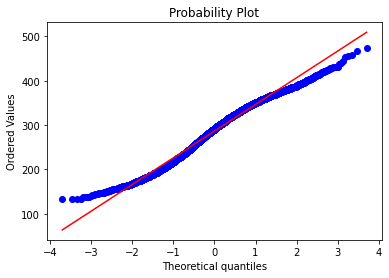

In [124]:
import scipy.stats as stats
import pylab 
stats.probplot(df_icfes['PUNT_GLOBAL'], dist="norm", plot=pylab)
pylab.show()

La variable presenta una inclinación hacia la izquierda

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



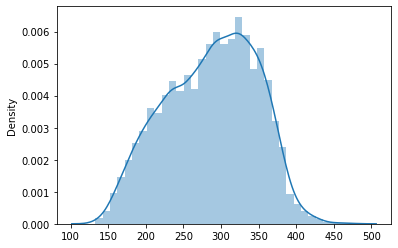

In [117]:
#observar el comportamiento de la variable puntake global en el icfes 

sns.distplot(df_icfes[['PUNT_GLOBAL']])

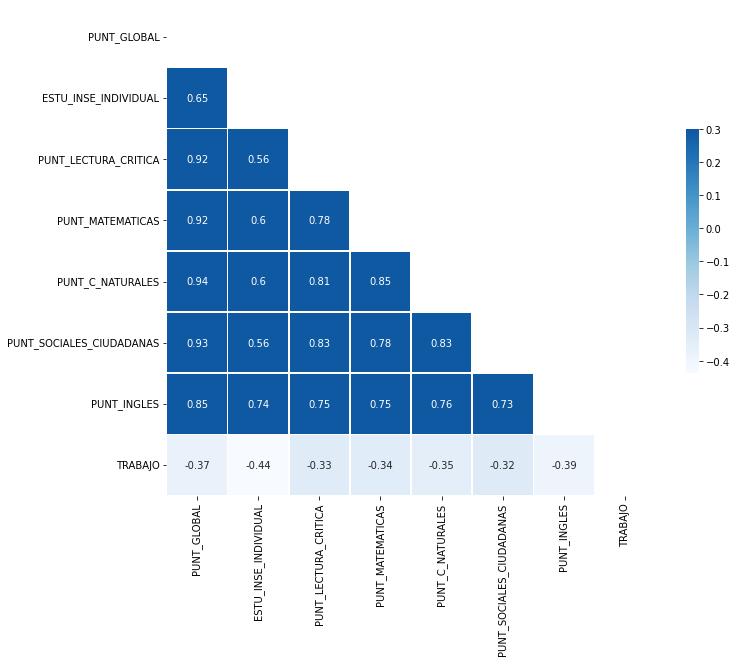

In [116]:
# Código
corr = df_icfes.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap="Blues",annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Sobre la puntuación global observamos una correlación sobre el indice socioeconomico evaluado y una relación elevada ente los resultados globales y los puntajes de cada prueba

A continuación observamos comportamiento y puntaje respectoa nuestras variables de interes

Según los resultados del grafico no se observa relación entre trabajo y resultados globales


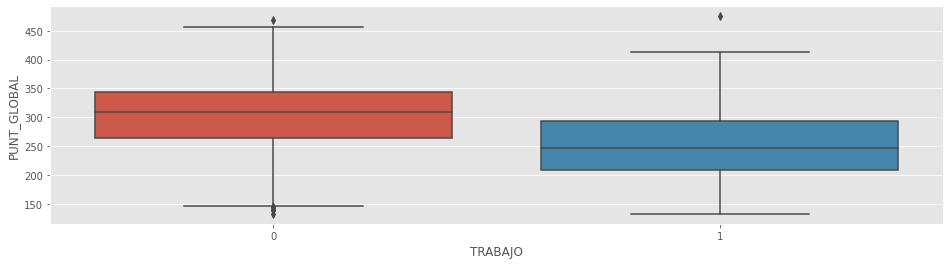

In [136]:
plt.figure(figsize=(16,4))
sns.boxplot( y=df_icfes["PUNT_GLOBAL"], x=df_icfes["TRABAJO"] )
print("Según los resultados del grafico no se observa relación entre trabajo y resultados globales")

Según los resultados del graficose observa una relación en entudiar de 1 a 3 horas y más de tres horas, es decir que entre mas tiempo dedicado al estimo mejores resultados 


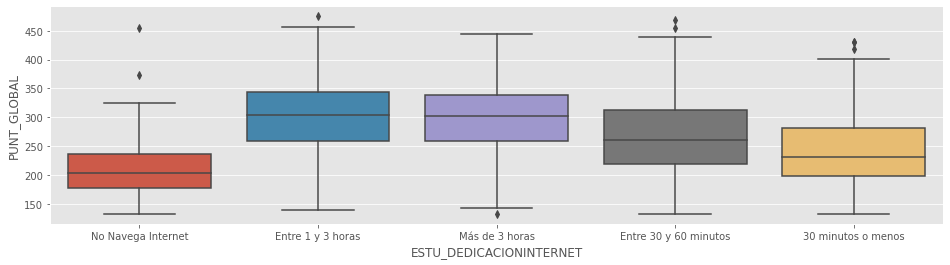

In [138]:
plt.figure(figsize=(16,4))
sns.boxplot( y=df_icfes["PUNT_GLOBAL"], x=df_icfes["ESTU_DEDICACIONINTERNET"] )
print("Según los resultados del graficose observa una relación en entudiar de 1 a 3 horas y más de tres horas, es decir que entre mas tiempo dedicado al estimo mejores resultados ")

Según los resultados del graficose observa un menor puntaje global que en los urbanos 


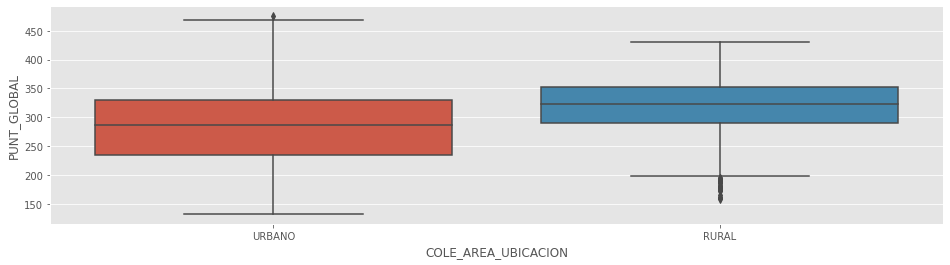

In [140]:
plt.figure(figsize=(16,4))
sns.boxplot( y=df_icfes["PUNT_GLOBAL"], x=df_icfes["COLE_AREA_UBICACION"] )
print("Según los resultados del graficose observa un menor puntaje global que en los urbanos ")

Mientras mayor sea al acceso a internet mayores oportunidades tendrá de un buen rendimiento en las pruebas saber 11


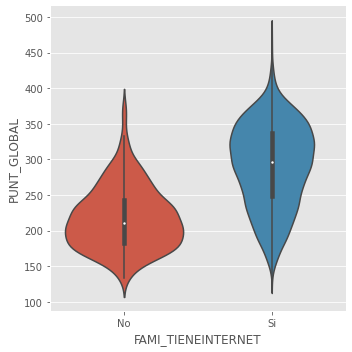

In [143]:
sns.catplot(x = "FAMI_TIENEINTERNET", y = "PUNT_GLOBAL", data = df_icfes, kind = "violin")
print("Mientras mayor sea al acceso a internet mayores oportunidades tendrá de un buen rendimiento en las pruebas saber 11")

Según los resultados del graficose observa un mayor rendimiento en los estratos mas altos


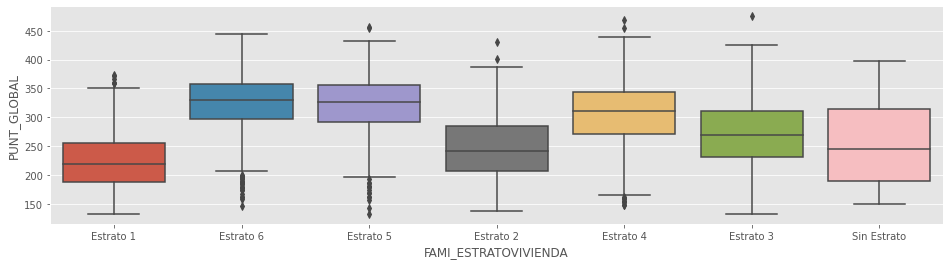

In [145]:
plt.figure(figsize=(16,4))
sns.boxplot( y=df_icfes["PUNT_GLOBAL"], x=df_icfes["FAMI_ESTRATOVIVIENDA"] )
print("Según los resultados del graficose observa un mayor rendimiento en los estratos mas altos")

Dada la información anterior obtenemos el diguiente dataframe


In [148]:
df_icfes_2 = df_icfes[['FAMI_ESTRATOVIVIENDA',
                          'FAMI_TIENEINTERNET',
                          'COLE_AREA_UBICACION',
                          'FAMI_TIENECOMPUTADOR',
                          'ESTU_DEDICACIONINTERNET',
                          'ESTU_INSE_INDIVIDUAL',
                          'PUNT_GLOBAL'
                         ]]

df_icfes_2.head(3)

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,COLE_AREA_UBICACION,FAMI_TIENECOMPUTADOR,ESTU_DEDICACIONINTERNET,ESTU_INSE_INDIVIDUAL,PUNT_GLOBAL
1013288,Estrato 1,No,URBANO,No,No Navega Internet,32.982652,164.0
1013290,Estrato 1,No,URBANO,No,No Navega Internet,37.868242,162.0
1013291,Estrato 1,Si,URBANO,Si,Entre 1 y 3 horas,54.880608,188.0


In [156]:
#Base de entrenamiento 
train_df = df_icfes_2.sample(frac=0.80,random_state=18)
model = ols('PUNT_GLOBAL ~  C(FAMI_ESTRATOVIVIENDA) +C(FAMI_TIENEINTERNET)+C(COLE_AREA_UBICACION)+C(ESTU_DEDICACIONINTERNET)+C(ESTU_INSE_INDIVIDUAL)', data=train_df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     2.362
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           8.97e-39
Time:                        02:05:26   Log-Likelihood:                -21465.
No. Observations:                5257   AIC:                         5.215e+04
Df Residuals:                     645   BIC:                         8.244e+04
Df Model:                        4611                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                             179.2728     41.189      4.352      0.000      98.392     260.154
C(FAMI_ESTRATOVIVIENDA)[T.Estrato 2]                   34.4781     22.966      1.501      0.134     -10.619      79.575
C(FAMI_ESTRATOVIVIENDA)[T.Estrato 3]                   48.4696     22.449      2.159      0.031       4.388      92.552
C(FAMI_ESTRATOVIVIENDA)[T.Estrato 4]                   64.1680     21.946      2.924      0.004      21.074     107.262
C(FAMI_ESTRATOVIVIENDA)[T.Estrato 5]                   71.3152     21.832      3.267      0.001      28.445     114.186
C(FAMI_ESTRATOVIVIENDA)[T.Estrato 6]                   69.9519     21.946      3.187      0.002      26.858     113.046
C(FAMI_ESTRATOVIVIENDA)[T.Sin Estrato]                 57.3431     26.669      2.150      0.032       4.974     109.712
C(FAMI_TIENEINTERNET)[T.Si]                            50.1290     24.034      2.086      0.037       2.935      97.323
C(COLE_AREA_UBICACION)[T.URBANO]                        6.7272      4.071      1.653      0.099      -1.266      14.721
C(ESTU_DEDICACIONINTERNET)[T.Entre 1 y 3 horas]         3.3313     10.940      0.304      0.761     -18.152      24.814
C(ESTU_DEDICACIONINTERNET)[T.Entre 30 y 60 minutos]    -5.4991     12.174     -0.452      0.652     -29.404      18.406
C(ESTU_DEDICACIONINTERNET)[T.Más de 3 horas]           -8.2142     10.971     -0.749      0.454     -29.757      13.329
C(ESTU_DEDICACIONINTERNET)[T.No Navega Internet]      -19.0549     42.759     -0.446      0.656    -103.018      64.909
C(ESTU_INSE_INDIVIDUAL)[T.21.326190798193103]          50.0549     72.030      0.695      0.487     -91.386     191.496
C(ESTU_INSE_INDIVIDUAL)[T.23.201601543993203]          69.0549     72.030      0.959      0.338     -72.386     210.496
C(ESTU_INSE_INDIVIDUAL)[T.24.9035821929665]           -57.3431     49.888     -1.149      0.251    -155.305      40.619
C(ESTU_INSE_INDIVIDUAL)[T.25.182768139765898]         -14.9451     72.030     -0.207      0.836    -156.386     126.496
C(ESTU_INSE_INDIVIDUAL)[T.25.5973774043583]             2.0549     72.030      0.029      0.977    -139.386     143.496
C(ESTU_INSE_INDIVIDUAL)[T.26.428538044587604]         -50.8439     50.443     -1.008      0.314    -149.896      48.208
C(ESTU_INSE_INDIVIDUAL)[T.26.466031496472603]           5.0210     48.461      0.104      0.918     -90.139     100.181
C(ESTU_INSE_INDIVIDUAL)[T.26.6511281981398]           -39.3431     49.888     -0.789      0.431    -137.305      58.619
C(ESTU_INSE_INDIVIDUAL)[T.26.6973504931955]            34.0549     72.030      0.473      0.637    -107.386     175.496
C(ESTU_INSE_INDIVIDUAL)[T.27.0388934893289]           -81.2603     60.791     -1.33

**Análisis modelo**

$R^2$ ajustado: indican que el 54.4% de la suma de cuadrados totales esta explicada por la suma de cuadrados de la regresión. Entre más cercano este valor este a 1, mejor es el desempeño del modelo, lo cual nos indica que no tiene buen desempeño y predicción baja

$(F-statistic) Probabilidad $: valor cercano a 0, No hay evidencia suficiente para rechazar la hipotesis nula de que todos los $β$ del modelo son 0,lo que significa que el modelo es significativo para explicar el puntaje de los estudiantes en la prueba.

$Skew$: Mide la asimetria para compararla con una distribución normal, cuya asimetria se inclina hacia la inzquierda. En este caso toma un valor de -1

$Kurtosis$: Mide la curtosis para compararla con una distribución normal, cuya curtosis es 22

$Jarque-Bera$: La prueba de Jarque-Bera utiliza un estadístico de prueba que involucra la curtosis y la asimetría. Intenta resolver si “Los residuos tienen una distribución normal”,como Prob(JB)=0.00< 0.05 los residuos tienen una distribución normal, sin embargo en este caso no es asi por lo cual mantenemos el supuesto de que el modelo no es normal

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

**¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?**

¿ se encuentran diferencias entre los percentiles relacionados al acceso de herramientas como lo son computadores, internet y área de ubicación? 

Esta herramienta permite identificar si el acceso a herramientas tecnológicas y difere denepdniendo de  la ubicación de los estudiantes 

In [157]:
df_icfes_2.columns

Index(['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'COLE_AREA_UBICACION',
       'FAMI_TIENECOMPUTADOR', 'ESTU_DEDICACIONINTERNET',
       'ESTU_INSE_INDIVIDUAL', 'PUNT_GLOBAL'],
      dtype='object')

In [169]:
computador = widgets.Dropdown(
                        description = 'Computador',
                        options = df_icfes_2['FAMI_TIENECOMPUTADOR'].unique().tolist(),
                        style = {'description_width': 'initial'}       
                       )

internet = widgets.Dropdown(
                        description = 'acceso a internet',
                        options = df_icfes_2['FAMI_TIENEINTERNET'].unique().tolist(),
                        style = {'description_width': 'initial'}       
                       )

area = widgets.Dropdown(
                        description = 'Institución',
                        options = df_icfes_2['COLE_AREA_UBICACION'].unique().tolist(),
                        style = {'description_width': 'initial'}      
                       )
# filtros 
def filtrar():
    filtrar_lista1 = [i and j and k for i, j, k in zip(
                                                        df_icfes_2['FAMI_TIENECOMPUTADOR'] == computador.value, 
                                                        df_icfes_2['FAMI_TIENEINTERNET'] == internet.value,
                                                        df_icfes_2['COLE_AREA_UBICACION'] == area.value
                                                     )
                    ]
    filtrar_lista2 = [i and j and k for i, j, k in zip(
                                                        df_icfes_2['FAMI_TIENECOMPUTADOR'] == computador.value, 
                                                        df_icfes_2['FAMI_TIENEINTERNET'] == internet.value,
                                                        df_icfes_2['COLE_AREA_UBICACION'] == area.value
                                                     )
                    ]
       
    df_1 = df_icfes_2[filtrar_lista1]
    df_2 = df_icfes_2[filtrar_lista2]


    

def respuesta(change):
    filtrar()
    
computador.observe(respuesta, names = 'value')
internet.observe(respuesta, names = 'value')
area.observe(respuesta, names = 'value')


filtrar()

parte_superior = widgets.HBox([computador])
parte_inferior=widgets.HBox([internet, area])

visualizacion = widgets.VBox(
              [parte_superior,
               parte_inferior]
            )


display(visualizacion)
